<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/project4_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chicago Crime (Project)

Name: Rahaf Hosari

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data <br/>
https://github.com/coding-dojo-data-science/preparing-chicago-crime-data/blob/admin/Workflow%20-%20Prep%20Chicago%20Crime%20Data.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
# path = 'https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$query=SELECT%0A%20%20%60id%60%2C%0A%20%20%60case_number%60%2C%0A%20%20%60date%60%2C%0A%20%20%60block%60%2C%0A%20%20%60iucr%60%2C%0A%20%20%60primary_type%60%2C%0A%20%20%60description%60%2C%0A%20%20%60location_description%60%2C%0A%20%20%60arrest%60%2C%0A%20%20%60domestic%60%2C%0A%20%20%60beat%60%2C%0A%20%20%60district%60%2C%0A%20%20%60ward%60%2C%0A%20%20%60community_area%60%2C%0A%20%20%60fbi_code%60%2C%0A%20%20%60x_coordinate%60%2C%0A%20%20%60y_coordinate%60%2C%0A%20%20%60year%60%2C%0A%20%20%60updated_on%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%2C%0A%20%20%60%3A%40computed_region_awaf_s7ux%60%2C%0A%20%20%60%3A%40computed_region_6mkv_f3dw%60%2C%0A%20%20%60%3A%40computed_region_vrxf_vc4k%60%2C%0A%20%20%60%3A%40computed_region_bdys_3d7i%60%2C%0A%20%20%60%3A%40computed_region_43wa_7qmu%60%2C%0A%20%20%60%3A%40computed_region_rpca_8um6%60%2C%0A%20%20%60%3A%40computed_region_d9mm_jgwp%60%2C%0A%20%20%60%3A%40computed_region_d3ds_rm58%60%0AWHERE%20%60date%60%20%3C%20%222023-01-01T15%3A15%3A35%22%20%3A%3A%20floating_timestamp%0AORDER%20BY%20%60date%60%20DESC%20NULL%20FIRST'
path = "https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$query=SELECT%0A%20%20%60id%60%2C%0A%20%20%60case_number%60%2C%0A%20%20%60date%60%2C%0A%20%20%60block%60%2C%0A%20%20%60iucr%60%2C%0A%20%20%60primary_type%60%2C%0A%20%20%60description%60%2C%0A%20%20%60location_description%60%2C%0A%20%20%60arrest%60%2C%0A%20%20%60domestic%60%2C%0A%20%20%60beat%60%2C%0A%20%20%60district%60%2C%0A%20%20%60ward%60%2C%0A%20%20%60community_area%60%2C%0A%20%20%60fbi_code%60%2C%0A%20%20%60x_coordinate%60%2C%0A%20%20%60y_coordinate%60%2C%0A%20%20%60year%60%2C%0A%20%20%60updated_on%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60location%60%2C%0A%20%20%60%3A%40computed_region_awaf_s7ux%60%2C%0A%20%20%60%3A%40computed_region_6mkv_f3dw%60%2C%0A%20%20%60%3A%40computed_region_vrxf_vc4k%60%2C%0A%20%20%60%3A%40computed_region_bdys_3d7i%60%2C%0A%20%20%60%3A%40computed_region_43wa_7qmu%60%2C%0A%20%20%60%3A%40computed_region_rpca_8um6%60%2C%0A%20%20%60%3A%40computed_region_d9mm_jgwp%60%2C%0A%20%20%60%3A%40computed_region_d3ds_rm58%60%0AWHERE%20%60date%60%20%3C%20%222023-01-01T15%3A15%3A35%22%20%3A%3A%20floating_timestamp%0AORDER%20BY%20%60date%60%20DESC%20NULL%20FIRST"
df = pd.read_csv(path)
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58
0,12938942,JG100778,2023-01-01T15:15:00.000,003XX E 47TH ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,RESTAURANT,True,False,224,2,3,38,18,1179387.0,1873937.0,2023,2023-08-19T15:40:26.000,41.809369,-87.617558,"\n, \n(41.809368812, -87.617558131)",12.0,4301.0,4.0,162.0,9.0,36.0,24.0,98.0
1,12938945,JG100821,2023-01-01T15:15:00.000,065XX S PEORIA ST,1755,OFFENSE INVOLVING CHILDREN,CHILD ABANDONMENT,APARTMENT,False,True,723,7,6,68,20,1171430.0,1861506.0,2023,2023-08-19T15:40:26.000,41.775435,-87.647107,"\n, \n(41.775434922, -87.647106807)",17.0,21559.0,66.0,436.0,32.0,11.0,17.0,202.0
2,12939867,JG101811,2023-01-01T15:10:00.000,002XX E 121ST PL,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,False,532,5,9,53,04A,1180112.0,1824450.0,2023,2023-08-19T15:40:26.000,41.673554,-87.616411,"\n, \n(41.673554115, -87.616411124)",30.0,21861.0,50.0,504.0,43.0,19.0,10.0,219.0
3,12939039,JG100803,2023-01-01T15:10:00.000,099XX S PAXTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,True,True,431,4,7,51,08B,1192811.0,1839551.0,2023,2023-08-19T15:40:26.000,41.714694,-87.569442,"\n, \n(41.714693603, -87.569442106)",43.0,21202.0,48.0,252.0,37.0,25.0,19.0,249.0
4,12939335,JG101166,2023-01-01T15:00:00.000,076XX S CICERO AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,833,8,18,65,07,1145727.0,1853720.0,2023,2023-08-19T15:40:26.000,41.754593,-87.741529,"\n, \n(41.754592961, -87.741528537)",23.0,4300.0,63.0,318.0,30.0,8.0,13.0,209.0


In [ ]:
df.index

RangeIndex(start=0, stop=1000, step=1)

# **Topic 1)** Comparing Police Districts <br/>
- Which district had the most crimes in 2022?
- Which had the least?

In [ ]:
path_2022 = "/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Project 4 - Time Series Analysis/Chicago_Crime_2001-2022/Data/Chicago-Crime_2022.csv"
df_2022 = pd.read_csv(path_2022)
df_2022.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12582293,01/01/2022 01:00:00 PM,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
1,12607313,01/01/2022 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2,12585671,01/01/2022 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
3,12592889,01/01/2022 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
4,12584977,01/01/2022 01:00:00 AM,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238858 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 18.7+ MB


In [ ]:
df_2022['Date'].isna().sum()

np.int64(0)

In [ ]:
#Convert Date Column to DateTime
df_2022['DateTime'] = pd.to_datetime(df_2022['Date'])

<ipython-input-11-53cedf4b1cd7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2022['DateTime'] = pd.to_datetime(df_2022['Date'])


In [ ]:
df_2022 = df_2022.set_index('DateTime')
df_2022.index

DatetimeIndex(['2022-01-01 13:00:00', '2022-01-01 13:00:00',
               '2022-01-01 01:00:00', '2022-01-01 01:00:00',
               '2022-01-01 01:00:00', '2022-01-01 13:00:00',
               '2022-01-01 01:00:00', '2022-01-01 01:00:00',
               '2022-01-01 13:00:00', '2022-01-01 01:00:00',
               ...
               '2022-12-31 12:41:00', '2022-12-31 00:42:00',
               '2022-12-31 00:44:00', '2022-12-31 00:45:00',
               '2022-12-31 12:45:00', '2022-12-31 12:50:00',
               '2022-12-31 12:50:00', '2022-12-31 00:52:00',
               '2022-12-31 12:52:00', '2022-12-31 12:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=238858, freq=None)

In [ ]:
df_2022.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
DateTime,,,,,,,,,,,,
2022-01-01 13:00:00,12582293,01/01/2022 01:00:00 PM,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
2022-01-01 13:00:00,12607313,01/01/2022 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2022-01-01 01:00:00,12585671,01/01/2022 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
2022-01-01 01:00:00,12592889,01/01/2022 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
2022-01-01 01:00:00,12584977,01/01/2022 01:00:00 AM,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


In [ ]:
df_2022["Primary Type"].value_counts()

,count
Primary Type,
THEFT,54820
BATTERY,40911
CRIMINAL DAMAGE,27241
MOTOR VEHICLE THEFT,21449
ASSAULT,20796
DECEPTIVE PRACTICE,16405
OTHER OFFENSE,14558
ROBBERY,8965
WEAPONS VIOLATION,8766


In [ ]:
primary_type_by_district = df_2022.groupby(['District', 'Primary Type']).size()
primary_type_by_district

District  Primary Type                     
1.0       ARSON                                   8
          ASSAULT                               878
          BATTERY                              1773
          BURGLARY                              149
          CONCEALED CARRY LICENSE VIOLATION       2
                                               ... 
31.0      CRIMINAL TRESPASS                       1
          DECEPTIVE PRACTICE                      6
          OTHER OFFENSE                           1
          ROBBERY                                 1
          THEFT                                   3
Length: 593, dtype: int64

In [ ]:
# Group by 'District' and count the occurrences (crimes) for each district
district_crime_count = df_2022.groupby('District').size() # Sum of All Crimes Per District
district_crime_count.head()

,0
District,
1.0,13044
2.0,11793
3.0,11937
4.0,13931
5.0,9773


In [ ]:
# Find the district with the most and least crimes in 2022
most_crimes_district = district_crime_count.idxmax()
least_crimes_district = district_crime_count.idxmin()

print(f"District with most crimes : {most_crimes_district}, with {district_crime_count[most_crimes_district]} crimes.\nDistrict with least crimes : {least_crimes_district}, with {district_crime_count[least_crimes_district]} crimes.")

District with most crimes : 8.0, with 14805 crimes.
District with least crimes : 31.0, with 15 crimes.


# **Topic** 2) Crimes Across the Years <br/>

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [ ]:
folder_path = '/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Project 4 - Time Series Analysis/Chicago_Crime_2001-2022/Data'

In [ ]:
import os

# Load all CSV files in the folder into a list of DataFrames
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(folder_path, f), parse_dates=['Date']) for f in files]

<ipython-input-19-1c32c8d37dcd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = [pd.read_csv(os.path.join(folder_path, f), parse_dates=['Date']) for f in files]
<ipython-input-19-1c32c8d37dcd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = [pd.read_csv(os.path.join(folder_path, f), parse_dates=['Date']) for f in files]
<ipython-input-19-1c32c8d37dcd>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = [pd.read_csv(os.path.join(folder_path, f), parse_dates=['Date']) for f in files]
<ipython-input-19-1c32c8d37dcd>:5: UserWarning: Could not infer format, so e

In [ ]:
# Combine all DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [ ]:
df['Date'].isna().sum()

np.int64(0)

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date'])
df = df.set_index('DateTime')

In [ ]:
df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2020-12-31 12:38:00', '2020-12-31 12:40:00',
               '2020-12-31 00:40:00', '2020-12-31 12:40:00',
               '2020-12-31 12:45:00', '2020-12-31 12:45:00',
               '2020-12-31 00:49:00', '2020-12-31 00:49:00',
               '2020-12-31 12:50:00', '2020-12-31 00:55:00'],
              dtype='datetime64[ns]', name='DateTime', length=7713109, freq=None)

In [ ]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
DateTime,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [ ]:
total_crimes_per_year = df.groupby(df.index.year).size()
total_crimes_per_year

,0
DateTime,
2001,485886
2002,486807
2003,475985
2004,469422
2005,453773
2006,448179
2007,437087
2008,427183
2009,392827


In [ ]:
# Print the results
print("Total Crimes Per Year:")
print(total_crimes_per_year)

Total Crimes Per Year:
DateTime
2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437087
2008    427183
2009    392827
2010    370513
2011    351993
2012    336319
2013    307536
2014    275789
2015    264787
2016    269823
2017    269100
2018    268899
2019    261325
2020    212194
2021    208824
2022    238858
dtype: int64


In [ ]:
# Crime types across years
crime_types_per_year = df.groupby([df.index.year, 'Primary Type']).size().unstack(fill_value=0)
crime_types_per_year

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,1011,31384,93461,26014,1,1779,55859,29,13241,14949,1,934,667,0,406,279,933,1637,27553,50567,0,0,0,19,2263,6,29662,6026,9,2750,8,18441,2239,204,99277,4277
2002,1032,31523,94153,25623,0,1807,55941,27,13880,13732,0,971,658,0,361,337,829,1414,25121,51789,0,0,0,26,2594,5,32600,6408,8,2457,2,18523,2173,200,98332,4281
2003,955,29477,88380,25157,0,1571,55011,41,14807,13459,0,1088,604,0,409,364,705,1311,22748,54288,0,1,0,16,3047,2,31148,6214,6,2430,2,17332,2078,247,98876,4211
2004,778,28850,87136,24564,0,1538,53164,42,15913,13255,0,1122,455,0,531,349,482,985,22805,57060,0,0,0,13,3099,9,29532,7476,9,2495,1,15978,1805,215,95463,4298
2005,691,27067,83964,25503,0,1521,54548,37,16655,13590,0,1078,453,0,615,258,389,1005,22497,56234,0,0,0,19,2906,9,28028,6124,4,2730,2,16047,1817,192,85684,4106
2006,726,25945,80666,24324,0,1439,57124,47,14505,13606,0,1368,476,0,758,276,339,1135,21818,55813,0,0,0,17,2783,9,27101,7034,4,3068,7,15968,1576,186,86240,3821
2007,712,26313,79593,24858,0,1507,53749,53,13699,14170,0,1409,448,0,677,255,329,1170,18573,54454,0,0,0,12,2921,12,26863,6087,5,3315,1,15450,1529,213,85156,3554
2008,644,25448,75930,26218,0,1515,52843,47,12310,14933,0,1199,513,0,580,261,359,912,18881,46506,0,0,0,13,2661,12,26532,5141,4,3013,0,16703,1501,190,88437,3877
2009,616,22861,68460,26767,0,1401,47725,42,10851,13877,0,991,461,0,573,231,293,746,15482,43542,0,1,0,21,2632,7,25601,3940,10,3147,0,15981,1265,168,80976,4159


In [ ]:
# Save crime_types_per_year to a DataFrame
crime_types_df = pd.DataFrame(crime_types_per_year)

output_path = '/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Project 4 - Time Series Analysis/crime_types_per_year.csv'
crime_types_df.to_csv(output_path)

In [ ]:
crime_types_per_year.isna().sum().sum()

np.int64(0)

In [ ]:
# Calculate year-over-year changes for each crime type
crime_type_changes = crime_types_per_year.diff(axis=0)
crime_type_changes.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,21.0,139.0,692.0,-391.0,-1.0,28.0,82.0,-2.0,639.0,-1217.0,-1.0,37.0,-9.0,0.0,-45.0,58.0,-104.0,-223.0,-2432.0,1222.0,0.0,0.0,0.0,7.0,331.0,-1.0,2938.0,382.0,-1.0,-293.0,-6.0,82.0,-66.0,-4.0,-945.0,4.0
2003,-77.0,-2046.0,-5773.0,-466.0,0.0,-236.0,-930.0,14.0,927.0,-273.0,0.0,117.0,-54.0,0.0,48.0,27.0,-124.0,-103.0,-2373.0,2499.0,0.0,1.0,0.0,-10.0,453.0,-3.0,-1452.0,-194.0,-2.0,-27.0,0.0,-1191.0,-95.0,47.0,544.0,-70.0
2004,-177.0,-627.0,-1244.0,-593.0,0.0,-33.0,-1847.0,1.0,1106.0,-204.0,0.0,34.0,-149.0,0.0,122.0,-15.0,-223.0,-326.0,57.0,2772.0,0.0,-1.0,0.0,-3.0,52.0,7.0,-1616.0,1262.0,3.0,65.0,-1.0,-1354.0,-273.0,-32.0,-3413.0,87.0
2005,-87.0,-1783.0,-3172.0,939.0,0.0,-17.0,1384.0,-5.0,742.0,335.0,0.0,-44.0,-2.0,0.0,84.0,-91.0,-93.0,20.0,-308.0,-826.0,0.0,0.0,0.0,6.0,-193.0,0.0,-1504.0,-1352.0,-5.0,235.0,1.0,69.0,12.0,-23.0,-9779.0,-192.0


In [ ]:
# # Identify crimes that are decreasing when overall crime is increasing
# decreasing_crimes = crime_type_changes[(crime_type_changes < 0) & (total_crimes_per_year.diff() > 0)].dropna()


# # Identify crimes that are increasing when overall crime is decreasing
# increasing_crimes = crime_type_changes[(crime_type_changes > 0) & (total_crimes_per_year.diff() < 0)].dropna()

## Plot Crimes Across Year

In [ ]:
#Load Saved Df
crimes_per_year_path = "/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Project 4 - Time Series Analysis/crime_types_per_year.csv"
df_crime_types_per_year = pd.read_csv(crimes_per_year_path, index_col=0)
df_crime_types_per_year.head()

,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,1011,31384,93461,26014,1,1779,55859,29,13241,14949,1,934,667,0,406,279,933,1637,27553,50567,0,0,0,19,2263,6,29662,6026,9,2750,8,18441,2239,204,99277,4277
2002,1032,31523,94153,25623,0,1807,55941,27,13880,13732,0,971,658,0,361,337,829,1414,25121,51789,0,0,0,26,2594,5,32600,6408,8,2457,2,18523,2173,200,98332,4281
2003,955,29477,88380,25157,0,1571,55011,41,14807,13459,0,1088,604,0,409,364,705,1311,22748,54288,0,1,0,16,3047,2,31148,6214,6,2430,2,17332,2078,247,98876,4211
2004,778,28850,87136,24564,0,1538,53164,42,15913,13255,0,1122,455,0,531,349,482,985,22805,57060,0,0,0,13,3099,9,29532,7476,9,2495,1,15978,1805,215,95463,4298
2005,691,27067,83964,25503,0,1521,54548,37,16655,13590,0,1078,453,0,615,258,389,1005,22497,56234,0,0,0,19,2906,9,28028,6124,4,2730,2,16047,1817,192,85684,4106


In [ ]:
df_crime_types_per_year.index

Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='DateTime')

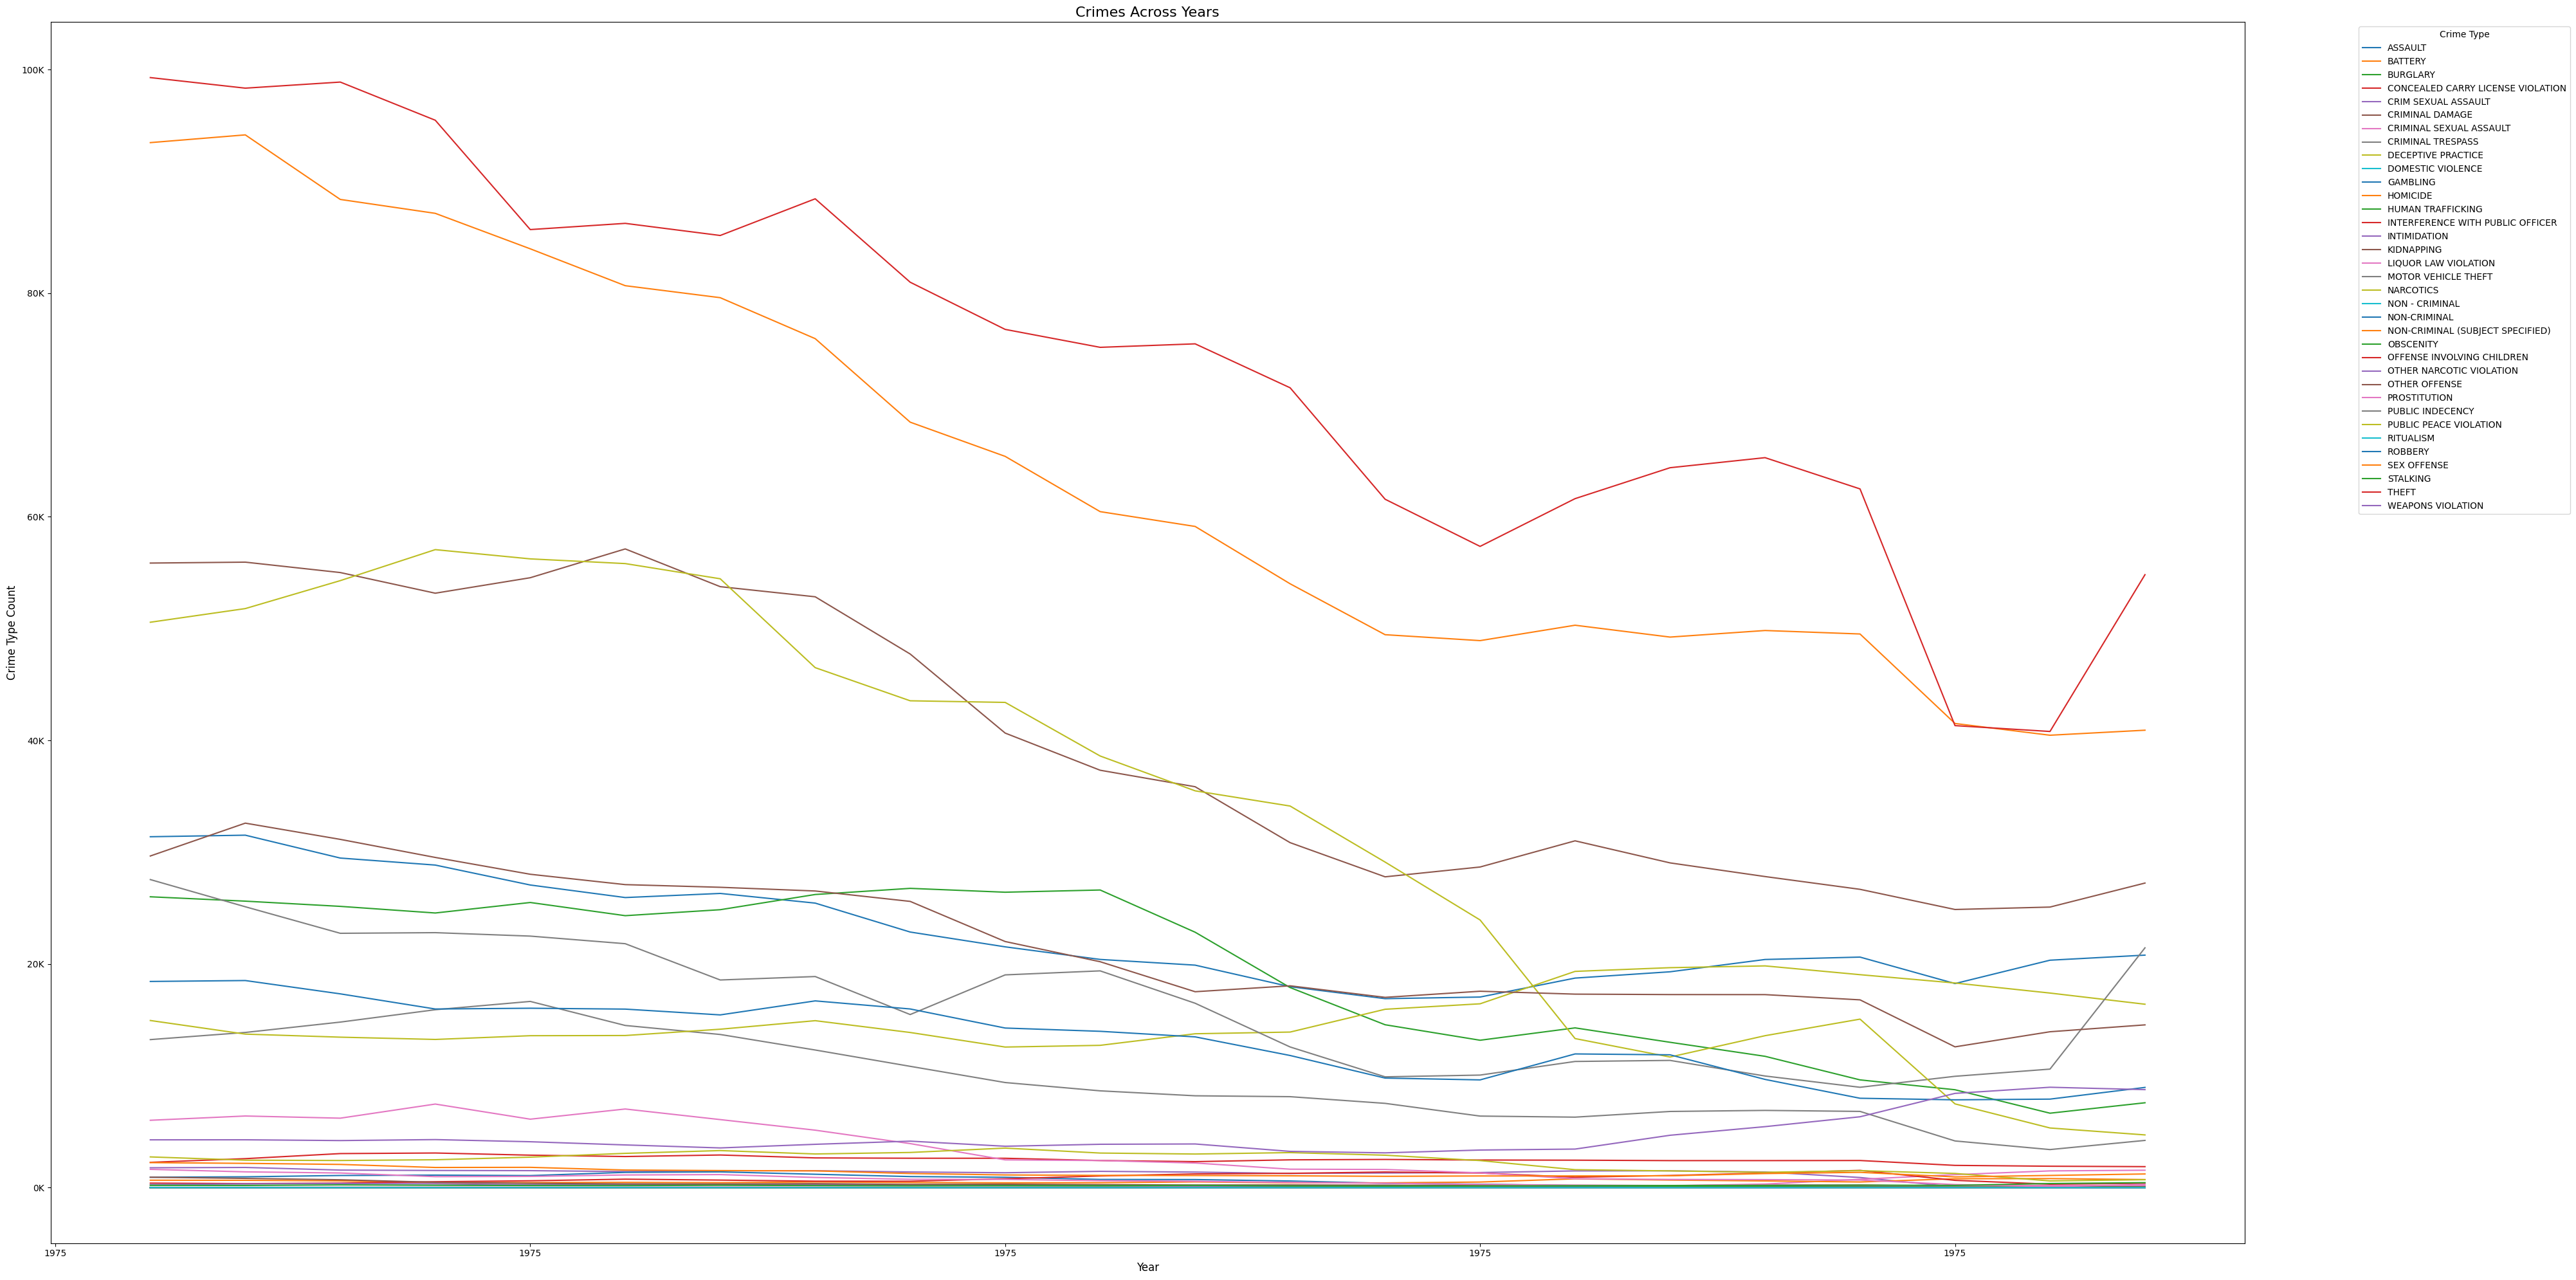

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

# Create a figure and axis
fig, ax = plt.subplots(figsize=(40, 20))

for crime_type in df_crime_types_per_year.columns[1:]:
    plt.plot(df_crime_types_per_year.index, df_crime_types_per_year[crime_type], label=crime_type)
# plt.plot(crime_types_per_year.index, crime_types_per_year, label='Crimes Across Years')


# Add title and axis labels
#Title
ax.set_title('Crimes Across Years', fontsize=16)
#X-axis
ax.set_xlabel('Year', fontsize=12)
# ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Every 1 year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

#Y-axis
ax.set_ylabel('Crime Type Count', fontsize=12)

# Format the y-axis to display values in thousands (K)
formatter = FuncFormatter(lambda x, pos: f'{int(x/1000)}K')
ax.yaxis.set_major_formatter(formatter)

# Add a legend
ax.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

## Bar Plot

In [ ]:
colors = plt.cm.Paired.colors  # or you can use another colormap like plt.cm.tab20
len(colors)

12

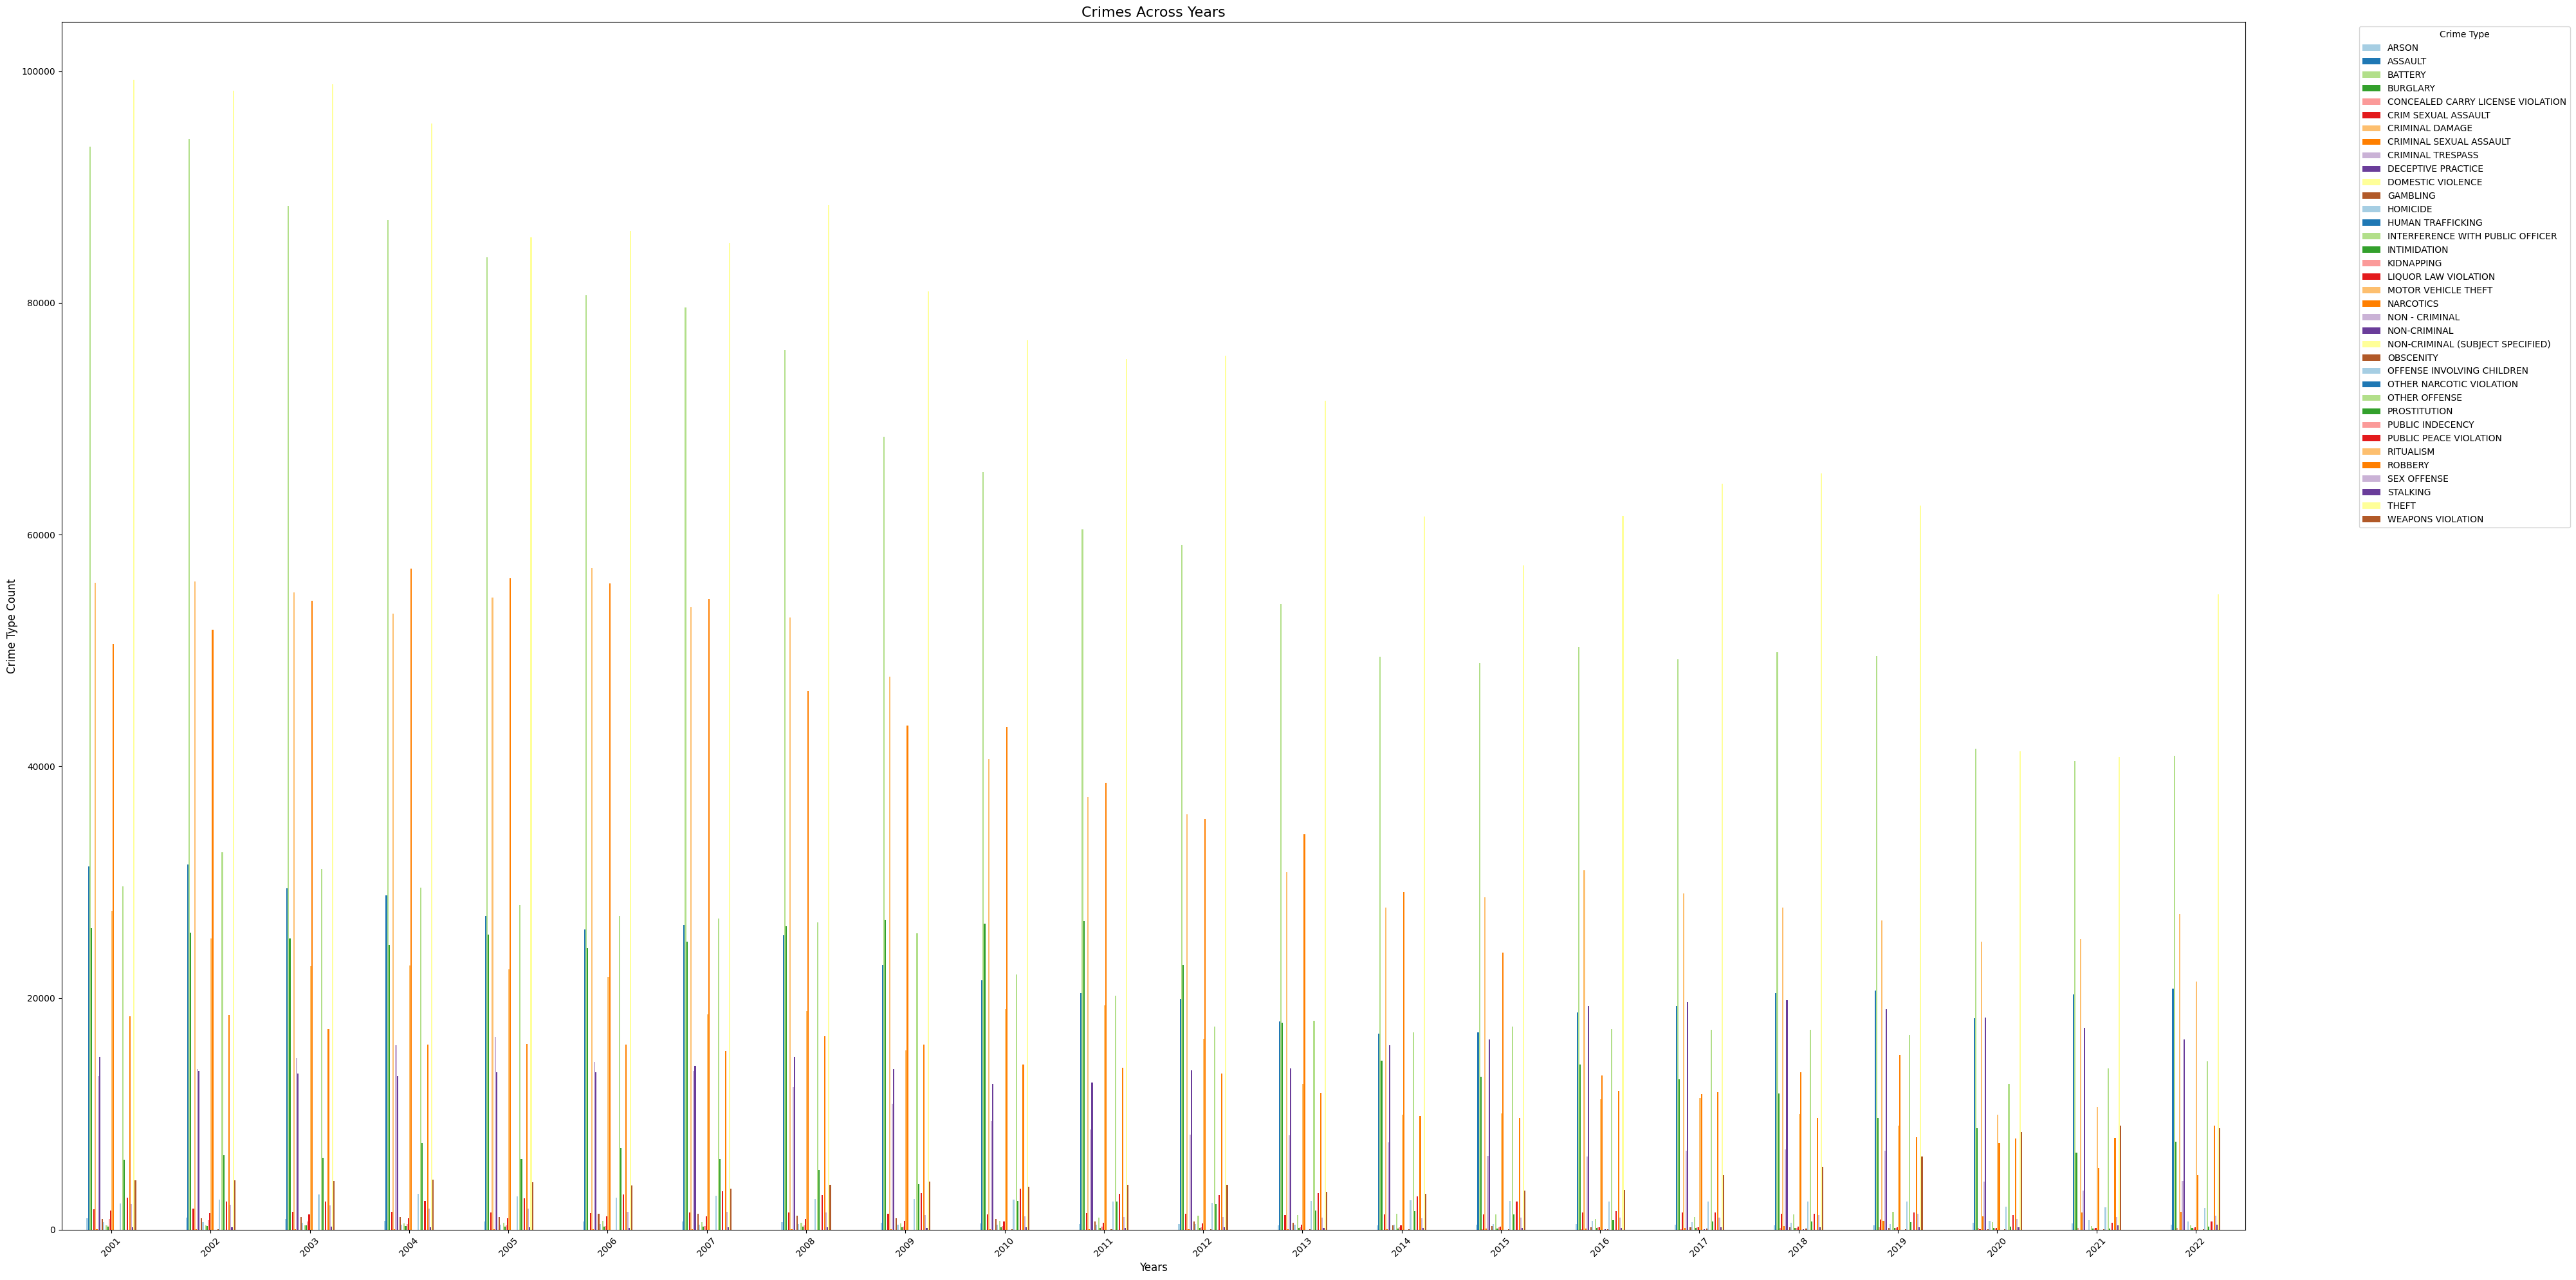

In [ ]:
# Plot home values for all cities in December 2008
plt.figure(figsize=(40, 20))
# df_crime_types_per_year.plot(kind='bar', color='skyblue')

df_crime_types_per_year.plot(kind='bar',color=plt.cm.Paired.colors, ax=plt.gca())

# Add titles and labels
plt.title('Crimes Across Years', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Crime Type Count', fontsize=12)

# Add legend and format the plot
# plt.legend()
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Topic 6)** What cycles (seasonality) can you find in this data? <br/>
Make sure to select the data of interest and resample it to the frequency you want. (For suggestions, See the "Suggested data to check for seasons" list at the bottom of this topic.)
Use statsmodels.tsa.seasonal.seasonal_decompose() to decompose the time series.
Note: seasonal_decompose cannot read data resampled as minutes or smaller, and if you try seconds, you will crash your computer. Keep your resampling at hours or more.

In [ ]:
# Crime types
crime_types = df.groupby([df.index, 'Primary Type']).size().unstack(fill_value=0)
crime_types.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,0,2,1,1,0,12,12,1,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,8,0,0,0,0,0,39,0,71,0
2001-01-01 00:01:00,0,0,1,1,0,9,7,0,0,18,0,0,0,0,0,0,0,0,4,0,0,0,0,0,36,0,4,0,0,0,0,0,13,0,49,0
2001-01-01 00:04:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2001-01-01 00:05:00,0,0,2,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
2001-01-01 00:07:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
crime_types.isna().sum().sum()

np.int64(0)

In [ ]:
crime_types.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:01:00',
               '2001-01-01 00:04:00', '2001-01-01 00:05:00',
               '2001-01-01 00:07:00', '2001-01-01 00:10:00',
               '2001-01-01 00:15:00', '2001-01-01 00:20:00',
               '2001-01-01 00:25:00', '2001-01-01 00:26:26',
               ...
               '2022-12-31 23:35:00', '2022-12-31 23:38:00',
               '2022-12-31 23:39:00', '2022-12-31 23:40:00',
               '2022-12-31 23:42:00', '2022-12-31 23:44:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='DateTime', length=3172250, freq=None)

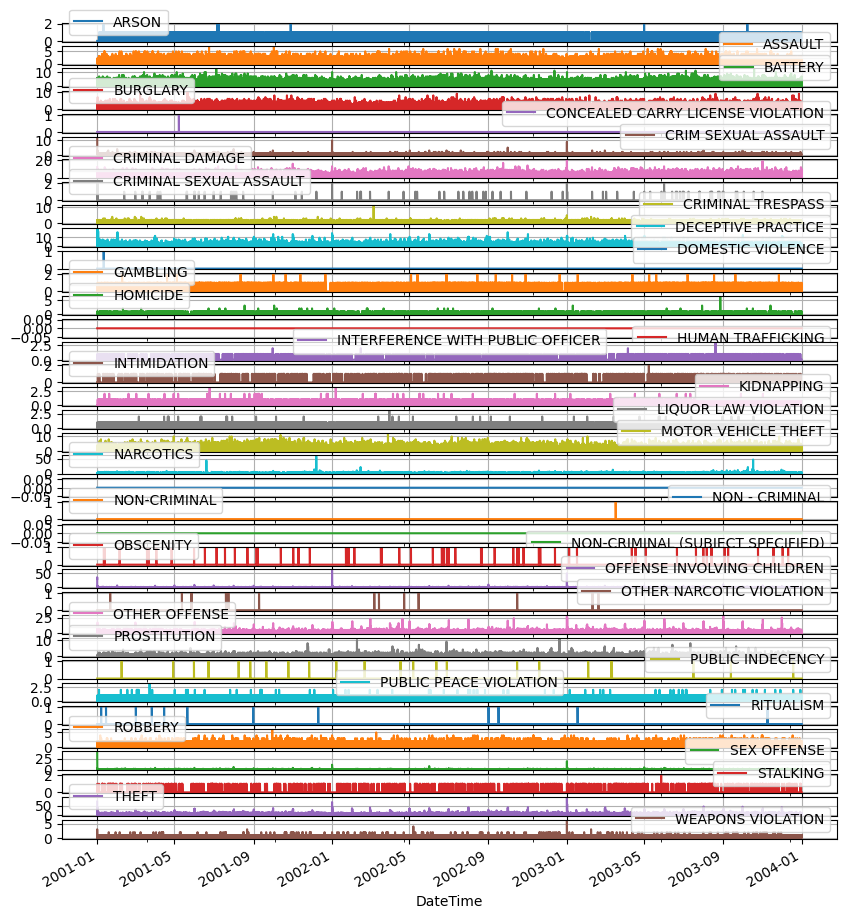

In [ ]:
crime_yr = crime_types.loc['2001':'2003']
crime_yr.plot(subplots=True,grid=True,figsize=(10,12));

In [ ]:
# crime_types.plot(grid=True,alpha=0.7);